# Mini-Project

## Can we predict COVID-19? / Can we truly learn from History?

### Project's Goal and Agenda

COVID-19 has impacted and is still impacting the world in a major way. 

Our goal for the project is to train a machine learning model that could possibly predict how COVID-19 cases will be like depending on a few key factors we have identified.

We have identified a few key factors that when put together could potentially be used to predict cases in the future and for other countries.

### Key Factors

In no particular order, below is the 4 factors we have identified for this project's case study and agenda.


2. Vaccination Percentage / Rate
3. Stringency Index
4. Hospitalization Percentage / Number
5. Number of Test Done


### Motivation for this project

Public COVID dataset is vital for obtaining a deeper understanding and uncovering trends, which will lead to new machine learning models that can be used to make valuable predictions about the future.

In the dataset that we will be exploring, it contains 207 countries profile on the statistics of the pandemic with the few notable variables being the new cases, vaccination rates, stringency index and hospitalisation number.

With this dataset, and the machine learning model that we will be using later, a similar covid outbreak in the future can be predicted earlier and nessecary precautions can be taken.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from fbprophet import Prophet
from matplotlib.cbook import boxplot_stats
sb.set()
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

### Importing Dataset on Public Holidays (For machine learning part later)

In [2]:
US_PH21 = pd.read_excel ("CountryPH.xlsx", sheet_name='USA 2021')
US_PH21.head()

,Date,PH,Remark
0,2021-01-01,Y,New Year's Day
1,2021-01-02,N,NaN
2,2021-01-03,N,NaN
3,2021-01-04,N,NaN
4,2021-01-05,N,NaN


In [3]:
US_PH22 = pd.read_excel ("CountryPH.xlsx", sheet_name='USA 2022')
US_PH22.head()

,Date,PH,Remark
0,2022-01-01,Y,New Year's Day
1,2022-01-02,N,NaN
2,2022-01-03,N,NaN
3,2022-01-04,N,NaN
4,2022-01-05,N,NaN


In [4]:
CA_PH21 = pd.read_excel ("CountryPH.xlsx", sheet_name='Canada 2021')
CA_PH21.head()

,Date,PH,Remark
0,2021-01-01,Y,New Year's Day
1,2021-01-02,N,NaN
2,2021-01-03,N,NaN
3,2021-01-04,N,NaN
4,2021-01-05,N,NaN


In [5]:
CA_PH22 = pd.read_excel ("CountryPH.xlsx", sheet_name='Canada 2022')
CA_PH22.head()

,Date,PH,Remark
0,2022-01-01,Y,New Year's Day
1,2022-01-02,N,NaN
2,2022-01-03,Y,Day off for New Year's Day
3,2022-01-04,N,NaN
4,2022-01-05,N,NaN


### Importing Dataset on Covid-19

In [6]:
covidDF = pd.read_excel("owid-covid-data.xlsx")
covidDF.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
print("Data dims : ", covidDF.shape)

Data dims :  (178330, 67)


From this dataset, we can see that there are too many rows of data to work with, so we will removing countries that we won't be exploring

### Cleaning Covid-19 Datset

Split the covid dataset into the countries that we will be exploring (location: United States, Canada)

### Firstly, we will clean the dataset for United States, by filtering out its location

In [8]:
UScovidDF= covidDF.loc[covidDF['location'] == "United States", ['location', 'date', 'total_cases', 'new_cases', 'total_cases_per_million', 'hosp_patients', 'new_tests', 'people_fully_vaccinated', 'stringency_index', 'population', 'gdp_per_capita', 'new_vaccinations', 'new_deaths', 'weekly_hosp_admissions', 'icu_patients', 'people_fully_vaccinated_per_hundred']]

In [9]:
UScovidDF

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
167987,United States,2020-01-22,1.0,NaN,0.003,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167988,United States,2020-01-23,1.0,0.0,0.003,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167989,United States,2020-01-24,2.0,1.0,0.006,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167990,United States,2020-01-25,2.0,0.0,0.006,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167991,United States,2020-01-26,5.0,3.0,0.015,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167992,United States,2020-01-27,5.0,0.0,0.015,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167993,United States,2020-01-28,5.0,0.0,0.015,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167994,United States,2020-01-29,6.0,1.0,0.018,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167995,United States,2020-01-30,6.0,0.0,0.018,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN
167996,United States,2020-01-31,8.0,2.0,0.024,NaN,NaN,NaN,0.00,332915074.0,54225.446,NaN,NaN,NaN,NaN,NaN


### Secondly, we will clean the dataset for United Kingdom, by filtering out its location

In [41]:
UKcovidDF= covidDF.loc[covidDF['location'] == "United Kingdom", ['location', 'date', 'total_cases', 'new_cases', 'total_cases_per_million', 'hosp_patients', 'new_tests', 'people_fully_vaccinated', 'stringency_index', 'population', 'gdp_per_capita', 'new_vaccinations', 'new_deaths', 'weekly_hosp_admissions', 'icu_patients', 'people_fully_vaccinated_per_hundred']]

UKcovidDF = UKcovidDF.fillna(0)

In [42]:
UKcovidDF

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
167184,United Kingdom,2020-01-31,2.0,2.0,0.029,0.0,0.0,0.0,8.33,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167185,United Kingdom,2020-02-01,2.0,0.0,0.029,0.0,0.0,0.0,8.33,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167186,United Kingdom,2020-02-02,2.0,0.0,0.029,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167187,United Kingdom,2020-02-03,8.0,6.0,0.117,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167188,United Kingdom,2020-02-04,8.0,0.0,0.117,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167189,United Kingdom,2020-02-05,9.0,1.0,0.132,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167190,United Kingdom,2020-02-06,9.0,0.0,0.132,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167191,United Kingdom,2020-02-07,9.0,0.0,0.132,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167192,United Kingdom,2020-02-08,13.0,4.0,0.191,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00
167193,United Kingdom,2020-02-09,14.0,1.0,0.205,0.0,0.0,0.0,11.11,68207114.0,39753.244,0.0,0.0,0.0,0.0,0.00


### Filter the United States covid dataset by date:
- 1st Jan 2021 to 31st Dec 2021 (train dataset)
- 1st Jan 2022 to 29th Mar 2022 (test dataset)

In [12]:
UScovidDF21 = UScovidDF[(UScovidDF['date'] >= '2021-01-01') & (UScovidDF['date'] <= '2021-12-31')] ##Train dataset
UScovidDF22 = UScovidDF[(UScovidDF['date'] >= '2022-01-01') & (UScovidDF['date'] <= '2022-03-29')] ##Test dataset
UScovidDF21 = UScovidDF21.reset_index(drop=True)
UScovidDF22 = UScovidDF22.reset_index(drop=True)

In [13]:
UScovidDF21

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
0,United States,2021-01-01,20370367.0,178908.0,61187.878,121053.0,1256226.0,48581.0,71.76,332915074.0,54225.446,105687.0,2242.0,109535.0,27471.0,0.01
1,United States,2021-01-02,20642648.0,272281.0,62005.747,122668.0,1118816.0,51457.0,71.76,332915074.0,54225.446,263955.0,2540.0,111290.0,27614.0,0.02
2,United States,2021-01-03,20846039.0,203391.0,62616.687,125595.0,1052071.0,53918.0,71.76,332915074.0,54225.446,139009.0,1423.0,112069.0,28006.0,0.02
3,United States,2021-01-04,21031555.0,185516.0,63173.934,127426.0,1409437.0,98827.0,71.76,332915074.0,54225.446,657192.0,1973.0,112336.0,28266.0,0.03
4,United States,2021-01-05,21264419.0,232864.0,63873.404,128858.0,1974185.0,186361.0,71.76,332915074.0,54225.446,831044.0,3594.0,113829.0,28528.0,0.06
5,United States,2021-01-06,21524179.0,259760.0,64653.663,129805.0,2339562.0,358995.0,71.76,332915074.0,54225.446,1022549.0,3910.0,114720.0,28608.0,0.11
6,United States,2021-01-07,21810433.0,286254.0,65513.504,128819.0,2262336.0,640107.0,71.76,332915074.0,54225.446,1169881.0,4013.0,115039.0,28491.0,0.19
7,United States,2021-01-08,22114510.0,304077.0,66426.881,127893.0,2152738.0,1003742.0,71.76,332915074.0,54225.446,1235859.0,4178.0,116013.0,28365.0,0.30
8,United States,2021-01-09,22379262.0,264752.0,67222.135,126426.0,1720187.0,1132540.0,71.76,332915074.0,54225.446,508565.0,3235.0,117656.0,28187.0,0.34
9,United States,2021-01-10,22590111.0,210849.0,67855.477,126538.0,1170363.0,1202213.0,71.76,332915074.0,54225.446,251478.0,2088.0,116243.0,28370.0,0.36


In [14]:
UScovidDF21.dtypes

location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_cases_per_million                float64
hosp_patients                          float64
new_tests                              float64
people_fully_vaccinated                float64
stringency_index                       float64
population                             float64
gdp_per_capita                         float64
new_vaccinations                       float64
new_deaths                             float64
weekly_hosp_admissions                 float64
icu_patients                           float64
people_fully_vaccinated_per_hundred    float64
dtype: object

In [15]:
UScovidDF22

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
0,United States,2022-01-01,55024111.0,188714.0,165279.722,96560.0,1246505.0,208812575.0,53.24,332915074.0,54225.446,102052.0,389.0,98910.0,18863.0,62.89
1,United States,2022-01-02,55309989.0,285878.0,166138.434,102693.0,1327726.0,208902865.0,53.24,332915074.0,54225.446,493222.0,378.0,105298.0,19606.0,62.92
2,United States,2022-01-03,56354828.0,1044839.0,169276.889,108779.0,2207853.0,209099283.0,53.24,332915074.0,54225.446,1226268.0,1840.0,111118.0,20341.0,62.98
3,United States,2022-01-04,57166940.0,812112.0,171716.286,114863.0,2894699.0,209313285.0,53.24,332915074.0,54225.446,1397079.0,2309.0,116772.0,21040.0,63.04
4,United States,2022-01-05,57829451.0,662511.0,173706.316,121478.0,3148258.0,209525762.0,53.24,332915074.0,54225.446,1427725.0,2182.0,122385.0,21532.0,63.11
5,United States,2022-01-06,58664396.0,834945.0,176214.298,126993.0,3135028.0,209737644.0,53.24,332915074.0,54225.446,1437112.0,2057.0,127763.0,22134.0,63.17
6,United States,2022-01-07,59534080.0,869684.0,178826.628,131875.0,2864413.0,209982265.0,53.24,332915074.0,54225.446,1615885.0,2401.0,132844.0,22862.0,63.25
7,United States,2022-01-08,59931741.0,397661.0,180021.110,133605.0,2165252.0,210156436.0,53.24,332915074.0,54225.446,1034470.0,814.0,138345.0,23150.0,63.30
8,United States,2022-01-09,60416690.0,484949.0,181477.784,137280.0,1630129.0,210231099.0,53.24,332915074.0,54225.446,491533.0,588.0,141776.0,23800.0,63.32
9,United States,2022-01-10,61800485.0,1383795.0,185634.385,142248.0,2078740.0,210420813.0,53.24,332915074.0,54225.446,1239675.0,2012.0,144566.0,24487.0,63.38


### Filter the United Kingdom covid dataset by date:
- 1st Jan 2021 to 31st Dec 2021 (train dataset)
- 1st Jan 2022 to 29th Mar 2022 (test dataset)

In [43]:
UKcovidDF21 = UKcovidDF[(UKcovidDF['date'] >= '2021-01-01') & (UKcovidDF['date'] <= '2021-12-31')] ##Train dataset
UKcovidDF22 = UKcovidDF[(UKcovidDF['date'] >= '2022-01-01') & (UKcovidDF['date'] <= '2022-03-29')] ##Test dataset
UKcovidDF21 = UKcovidDF21.reset_index(drop=True)
UKcovidDF22 = UKcovidDF22.reset_index(drop=True)

In [44]:
UKcovidDF21

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
0,United Kingdom,2021-01-01,2545102.0,53312.0,37314.319,26391.0,404917.0,0.0,79.63,68207114.0,39753.244,0.0,614.0,21360.0,2162.0,0.00
1,United Kingdom,2021-01-02,2602850.0,57748.0,38160.975,27563.0,411160.0,0.0,79.63,68207114.0,39753.244,0.0,447.0,22269.0,2256.0,0.00
2,United Kingdom,2021-01-03,2657861.0,55011.0,38967.504,29035.0,417861.0,0.0,79.63,68207114.0,39753.244,0.0,454.0,23048.0,2420.0,0.00
3,United Kingdom,2021-01-04,2716662.0,58801.0,39829.599,30777.0,463335.0,0.0,79.63,68207114.0,39753.244,0.0,407.0,23854.0,2560.0,0.00
4,United Kingdom,2021-01-05,2777606.0,60944.0,40723.113,30688.0,490443.0,0.0,87.96,68207114.0,39753.244,0.0,874.0,24719.0,2645.0,0.00
5,United Kingdom,2021-01-06,2839956.0,62350.0,41637.240,31948.0,553275.0,0.0,87.96,68207114.0,39753.244,0.0,1044.0,25826.0,2821.0,0.00
6,United Kingdom,2021-01-07,2892601.0,52645.0,42409.081,32585.0,604460.0,0.0,87.96,68207114.0,39753.244,0.0,1166.0,27196.0,2929.0,0.00
7,United Kingdom,2021-01-08,2960671.0,68070.0,43407.070,33780.0,652578.0,0.0,87.96,68207114.0,39753.244,0.0,1327.0,27834.0,3098.0,0.00
8,United Kingdom,2021-01-09,3020622.0,59951.0,44286.026,34034.0,530216.0,0.0,87.96,68207114.0,39753.244,0.0,1038.0,28521.0,3145.0,0.00
9,United Kingdom,2021-01-10,3075573.0,54951.0,45091.675,35393.0,444566.0,391399.0,87.96,68207114.0,39753.244,0.0,564.0,28812.0,3264.0,0.57


In [45]:
UKcovidDF21.dtypes

location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_cases_per_million                float64
hosp_patients                          float64
new_tests                              float64
people_fully_vaccinated                float64
stringency_index                       float64
population                             float64
gdp_per_capita                         float64
new_vaccinations                       float64
new_deaths                             float64
weekly_hosp_admissions                 float64
icu_patients                           float64
people_fully_vaccinated_per_hundred    float64
dtype: object

In [46]:
UKcovidDF22

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
0,United Kingdom,2022-01-01,13127967.0,163277.0,192472.108,14666.0,1085995.0,47437009.0,48.61,68207114.0,39753.244,23907.0,154.0,15055.0,857.0,69.55
1,United Kingdom,2022-01-02,13263481.0,135514.0,194458.909,15300.0,1537306.0,47453494.0,48.61,68207114.0,39753.244,140425.0,73.0,15624.0,864.0,69.57
2,United Kingdom,2022-01-03,13451558.0,188077.0,197216.349,16492.0,1775359.0,47482789.0,48.61,68207114.0,39753.244,190278.0,42.0,16132.0,878.0,69.62
3,United Kingdom,2022-01-04,13670848.0,219290.0,200431.410,17485.0,2145480.0,47523676.0,48.61,68207114.0,39753.244,288577.0,49.0,16216.0,900.0,69.68
4,United Kingdom,2022-01-05,13865342.0,194494.0,203282.930,18207.0,2200228.0,47565340.0,48.61,68207114.0,39753.244,318172.0,343.0,15986.0,875.0,69.74
5,United Kingdom,2022-01-06,14045858.0,180516.0,205929.516,18684.0,2083287.0,47600028.0,48.61,68207114.0,39753.244,289285.0,232.0,15924.0,868.0,69.79
6,United Kingdom,2022-01-07,14224902.0,179044.0,208554.521,18866.0,1778309.0,47635655.0,48.61,68207114.0,39753.244,280569.0,229.0,15865.0,840.0,69.84
7,United Kingdom,2022-01-08,14366257.0,141355.0,210626.959,18802.0,1387261.0,47687370.0,48.61,68207114.0,39753.244,318409.0,315.0,15888.0,820.0,69.92
8,United Kingdom,2022-01-09,14508222.0,141965.0,212708.340,19244.0,1699071.0,47718730.0,48.61,68207114.0,39753.244,195060.0,98.0,15988.0,816.0,69.96
9,United Kingdom,2022-01-10,14650923.0,142701.0,214800.512,20052.0,1746151.0,47745458.0,48.61,68207114.0,39753.244,194177.0,76.0,15968.0,821.0,70.00


## Combine Covid-19 and Public Holiday Dataset

Next, we will be importing a dataset from a public holidays repository which shows all the various holidays that happen in a year, which we may be using this in our ML later.

### US Dataset with holidays

In [20]:
UScovidDF.shape

(812, 16)

In [21]:
US_PH21.dtypes

Date      datetime64[ns]
PH                object
Remark            object
dtype: object

In [22]:
tempUS = UScovidDF21.astype({'date': 'datetime64'})
tempUS2 = UScovidDF22.astype({'date': 'datetime64'})

In [23]:
tempUS.dtypes

location                                       object
date                                   datetime64[ns]
total_cases                                   float64
new_cases                                     float64
total_cases_per_million                       float64
hosp_patients                                 float64
new_tests                                     float64
people_fully_vaccinated                       float64
stringency_index                              float64
population                                    float64
gdp_per_capita                                float64
new_vaccinations                              float64
new_deaths                                    float64
weekly_hosp_admissions                        float64
icu_patients                                  float64
people_fully_vaccinated_per_hundred           float64
dtype: object

In [24]:
tempUS.head()

,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred
0,United States,2021-01-01,20370367.0,178908.0,61187.878,121053.0,1256226.0,48581.0,71.76,332915074.0,54225.446,105687.0,2242.0,109535.0,27471.0,0.01
1,United States,2021-01-02,20642648.0,272281.0,62005.747,122668.0,1118816.0,51457.0,71.76,332915074.0,54225.446,263955.0,2540.0,111290.0,27614.0,0.02
2,United States,2021-01-03,20846039.0,203391.0,62616.687,125595.0,1052071.0,53918.0,71.76,332915074.0,54225.446,139009.0,1423.0,112069.0,28006.0,0.02
3,United States,2021-01-04,21031555.0,185516.0,63173.934,127426.0,1409437.0,98827.0,71.76,332915074.0,54225.446,657192.0,1973.0,112336.0,28266.0,0.03
4,United States,2021-01-05,21264419.0,232864.0,63873.404,128858.0,1974185.0,186361.0,71.76,332915074.0,54225.446,831044.0,3594.0,113829.0,28528.0,0.06


### 2021 US dataset with the public holidays

In [25]:
US_data21 = pd.merge(left=tempUS, right=US_PH21, left_on='date', right_on='Date')
del US_data21['Date']

In [26]:
print(US_data21.shape)
US_data21.head()

(365, 18)


,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred,PH,Remark
0,United States,2021-01-01,20370367.0,178908.0,61187.878,121053.0,1256226.0,48581.0,71.76,332915074.0,54225.446,105687.0,2242.0,109535.0,27471.0,0.01,Y,New Year's Day
1,United States,2021-01-02,20642648.0,272281.0,62005.747,122668.0,1118816.0,51457.0,71.76,332915074.0,54225.446,263955.0,2540.0,111290.0,27614.0,0.02,N,NaN
2,United States,2021-01-03,20846039.0,203391.0,62616.687,125595.0,1052071.0,53918.0,71.76,332915074.0,54225.446,139009.0,1423.0,112069.0,28006.0,0.02,N,NaN
3,United States,2021-01-04,21031555.0,185516.0,63173.934,127426.0,1409437.0,98827.0,71.76,332915074.0,54225.446,657192.0,1973.0,112336.0,28266.0,0.03,N,NaN
4,United States,2021-01-05,21264419.0,232864.0,63873.404,128858.0,1974185.0,186361.0,71.76,332915074.0,54225.446,831044.0,3594.0,113829.0,28528.0,0.06,N,NaN


### 2022 US dataset with the public holidays

In [27]:
US_data22 = pd.merge(left=tempUS2, right=US_PH22, left_on='date', right_on='Date')
del US_data22['Date']

In [28]:
print(US_data22.shape)
US_data22.head()

(88, 18)


,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita,new_vaccinations,new_deaths,weekly_hosp_admissions,icu_patients,people_fully_vaccinated_per_hundred,PH,Remark
0,United States,2022-01-01,55024111.0,188714.0,165279.722,96560.0,1246505.0,208812575.0,53.24,332915074.0,54225.446,102052.0,389.0,98910.0,18863.0,62.89,Y,New Year's Day
1,United States,2022-01-02,55309989.0,285878.0,166138.434,102693.0,1327726.0,208902865.0,53.24,332915074.0,54225.446,493222.0,378.0,105298.0,19606.0,62.92,N,NaN
2,United States,2022-01-03,56354828.0,1044839.0,169276.889,108779.0,2207853.0,209099283.0,53.24,332915074.0,54225.446,1226268.0,1840.0,111118.0,20341.0,62.98,N,NaN
3,United States,2022-01-04,57166940.0,812112.0,171716.286,114863.0,2894699.0,209313285.0,53.24,332915074.0,54225.446,1397079.0,2309.0,116772.0,21040.0,63.04,N,NaN
4,United States,2022-01-05,57829451.0,662511.0,173706.316,121478.0,3148258.0,209525762.0,53.24,332915074.0,54225.446,1427725.0,2182.0,122385.0,21532.0,63.11,N,NaN


## Exploratory part

In [29]:
numericdata_US = pd.DataFrame(UScovidDF[["total_cases", "new_cases", "total_cases_per_million", "hosp_patients", "new_tests", "people_fully_vaccinated"]])

In [30]:
numericdata_US.describe().round(2)

,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated
count,812.00,811.00,812.00,635.00,766.00,4.850000e+02
mean,27882784.48,99232.79,83753.45,57027.52,1114568.68,1.438532e+08
std,24103391.06,144801.62,72401.02,35279.21,606471.07,7.533431e+07
min,1.00,0.00,0.00,9859.00,348.00,6.333000e+03
25%,5195051.75,27796.00,15604.74,31449.50,669542.75,8.670777e+07
50%,28890037.50,54832.00,86779.00,45099.00,1036145.00,1.730727e+08
75%,42509021.75,117065.50,127687.28,81204.00,1535441.75,2.051308e+08
max,80477797.00,1383795.00,241736.72,154540.00,3148258.00,2.185212e+08


<AxesSubplot:xlabel='new_cases'>

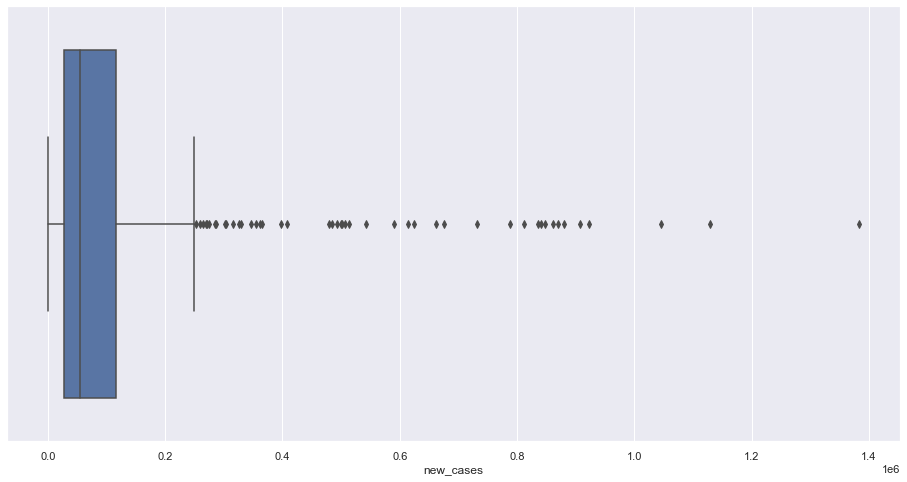

In [31]:
x = plt.figure(figsize=(16, 8))
sb.boxplot( x = numericdata_US["new_cases"])

### Generic function to for linear regression

In [32]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])
    y = y.to_numpy()
    X = X.to_numpy()

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    
      # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

### Exploration on how new tests will affect new cases

Firstly, before we analyse how the two variables can affect one another, firstly we will have to define what the two variable means.

New tests is the number of people tested for covid daily, and new cases is the number of people reportedly contracting the COVID-19 virus daily.

Intercept 	: b =  [-42979.00579134]
Coefficients 	: a =  [[0.10801099]]


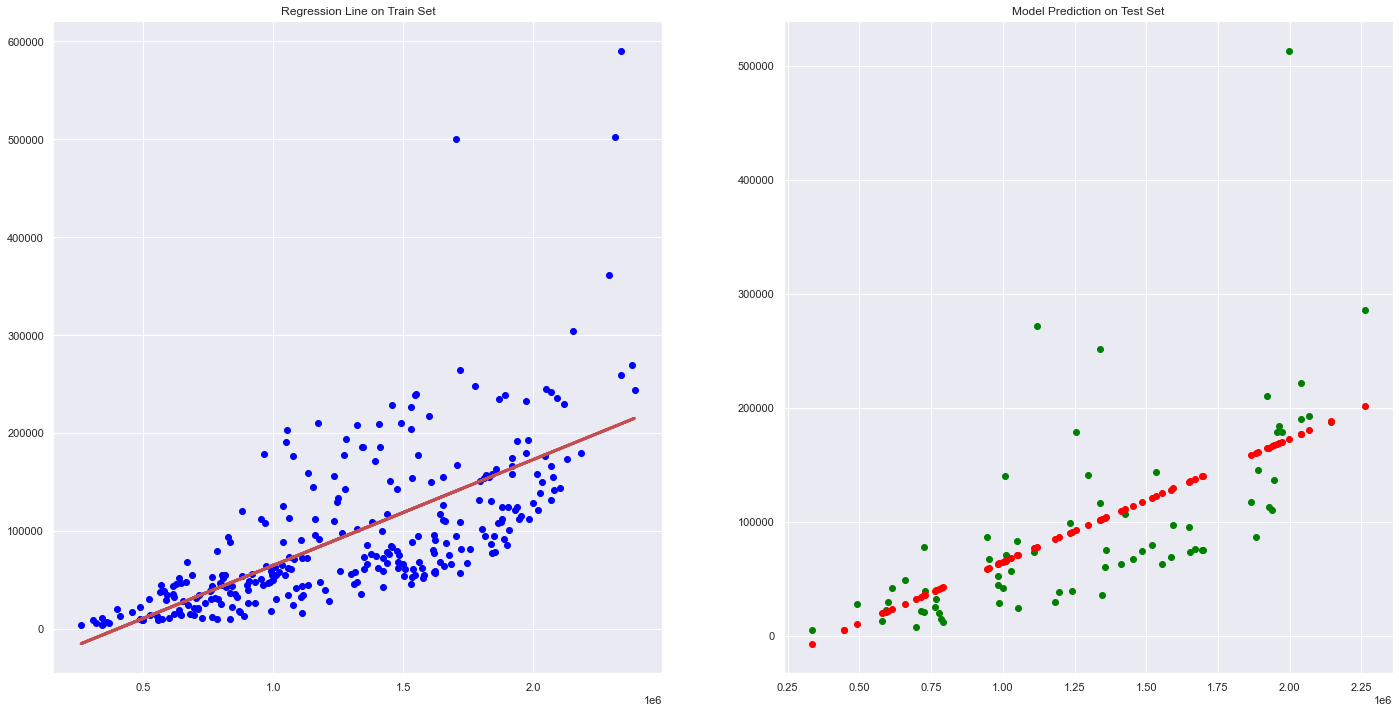

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4614424621402474
Mean Squared Error (MSE) 	: 3479416471.865728

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3827192562.5251365



In [33]:
univariateLinearRegression(Xvar = "new_tests", yvar = "new_cases", df = UScovidDF21)

### Exploration on how the number new vaccinations affects the new cases

The number of new vaccinations is defined as the number of people that are reported to get the vaccine

Intercept 	: b =  [101897.07769224]
Coefficients 	: a =  [[-0.00423233]]


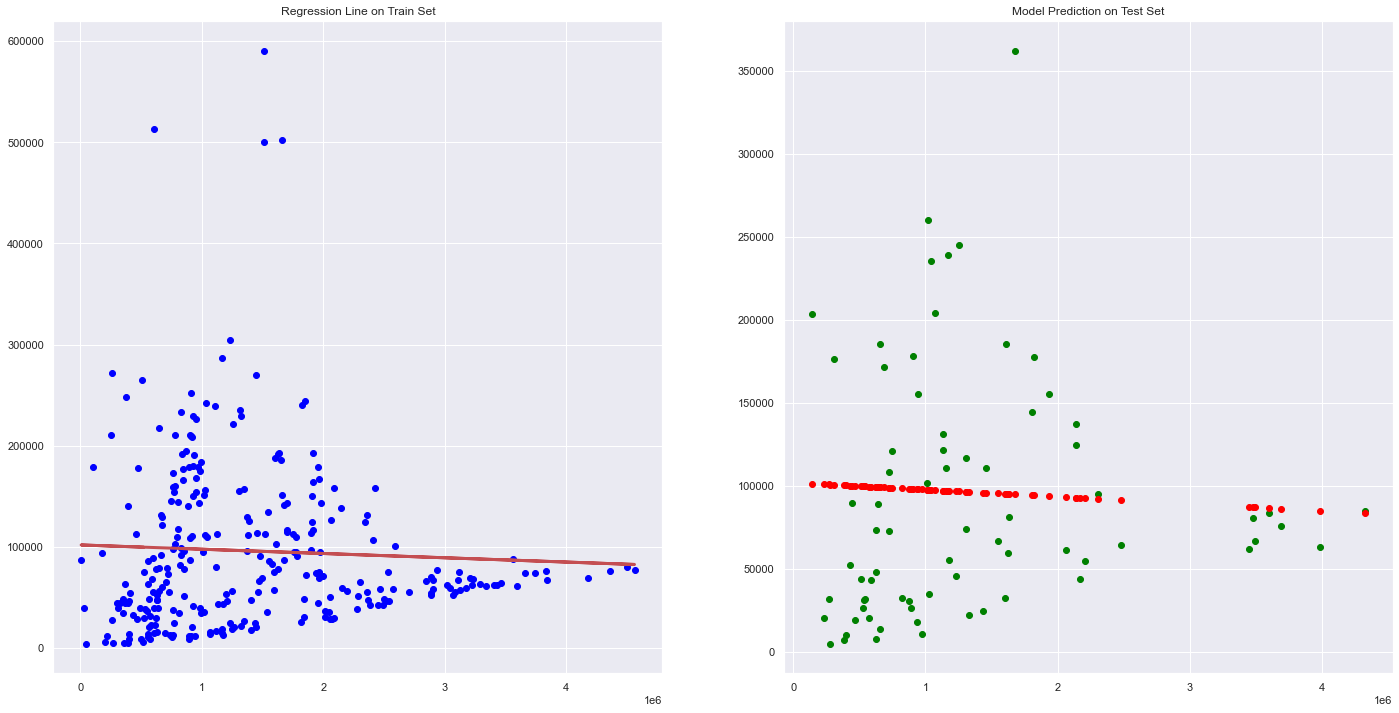

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.002284234917036554
Mean Squared Error (MSE) 	: 6835845110.562162

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 5349985657.316579



In [34]:
univariateLinearRegression(Xvar = "new_vaccinations", yvar = "new_cases", df = UScovidDF21)

### Exploration on how new deaths affects new cases

New deaths is defined as the number of people who die on a daily basis from COVID-19.

Intercept 	: b =  [36732.38153357]
Coefficients 	: a =  [[44.37549681]]


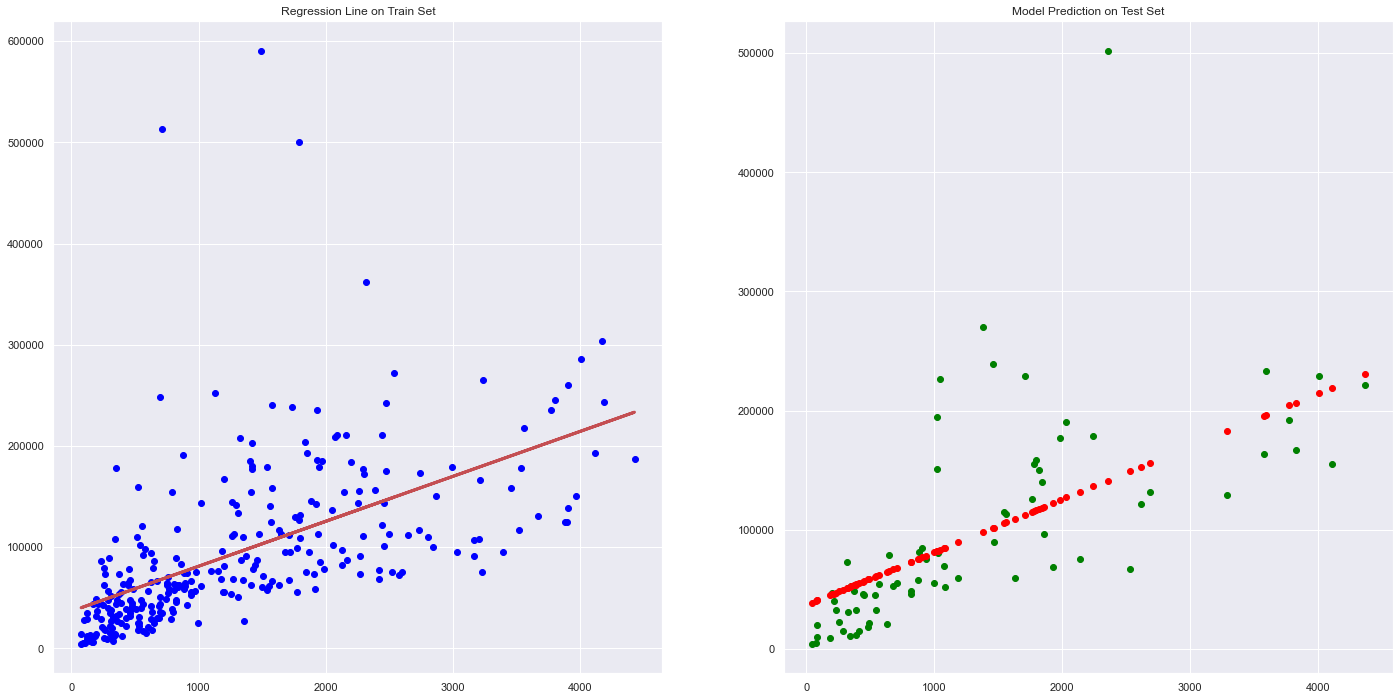

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32750289618755635
Mean Squared Error (MSE) 	: 4295993490.358198

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4074693477.6975007



In [35]:
univariateLinearRegression(Xvar = "new_deaths", yvar = "new_cases", df = UScovidDF21)

### Exploration on how the weekly hospital admissions affects new cases

The number of weekly hospital admissions is the number of people that are admitted into the hospital on a daily basis.

Intercept 	: b =  [-19697.78239696]
Coefficients 	: a =  [[2.34755094]]


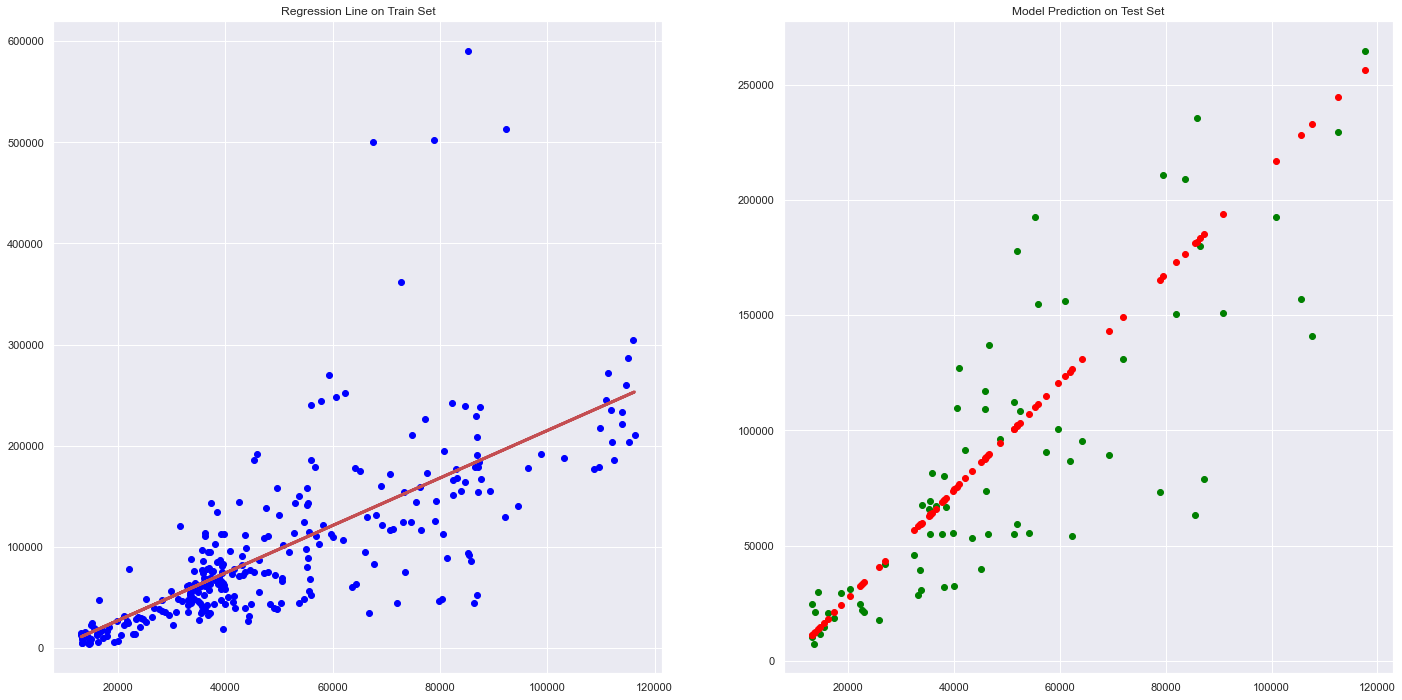

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5185422646350188
Mean Squared Error (MSE) 	: 3464721649.9386754

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1514402654.9964786



In [36]:
univariateLinearRegression(Xvar = "weekly_hosp_admissions", yvar = "new_cases", df = UScovidDF21)

### Exploration on how the number of ICU patients affects new cases

The number of ICU patients is defined as the recorded number of patients who are admitted to the intensive care unit on a daily basis.

Intercept 	: b =  [-12773.15928496]
Coefficients 	: a =  [[7.59128494]]


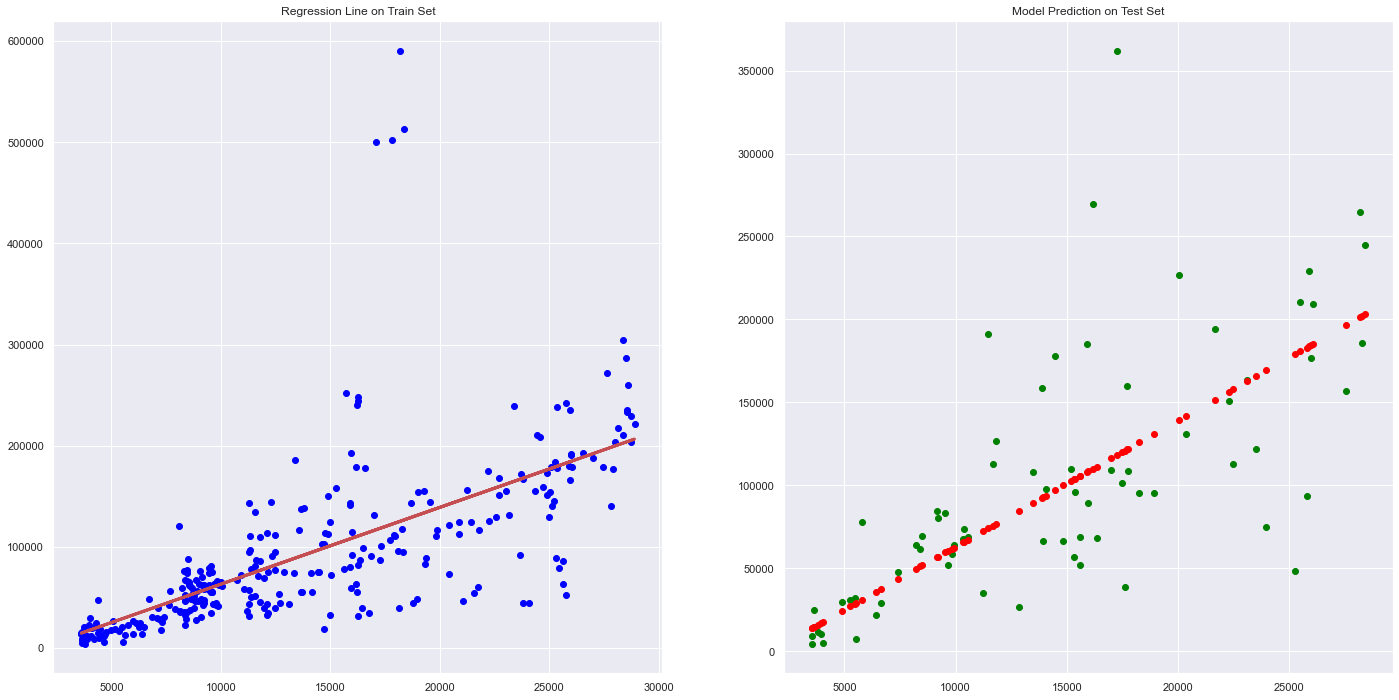

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4420819289699056
Mean Squared Error (MSE) 	: 3795092786.762799

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2889629862.5370364



In [37]:
univariateLinearRegression(Xvar = "icu_patients", yvar = "new_cases", df = UScovidDF21)

### Comparing the Uni-Variate Linear Models

* `weekly_hosp_admissions` vs `new_cases` has the best Explained Variance (R^2) out of the five models ~ 0.5.   
* `icu_patients` vs `new_cases` and `new_tests` vs `new_cases` have similar but lower R^2.    
* Naturally, the model with `weekly_hosp_admissions` is the best one in terms of the goodness of fit on Train Set. 
* However, `new_vaccinations` vs `new_cases` and `new_deaths` vs `new_cases` have low R^2, with `new_vaccinations`having an almost close to 0 value of R^2

It can be said from this exploration that new vaccinations does not nessecarily mean that the covid cases will decrease, as one can consider that for the vaccine to effectively take effect, a person is required to take two vaccination shots as well, and the new vaccinations daily might be the vaccinations for the first and second shot combined, so this vairable is not very accurate.

Then, we can explore on how the total number of fully vaccinated people can affect the new cases daily

### Exploration on how the total number of people fully vaccinated affects new cases

Intercept 	: b =  [96256.65401608]
Coefficients 	: a =  [[2.78383533]]


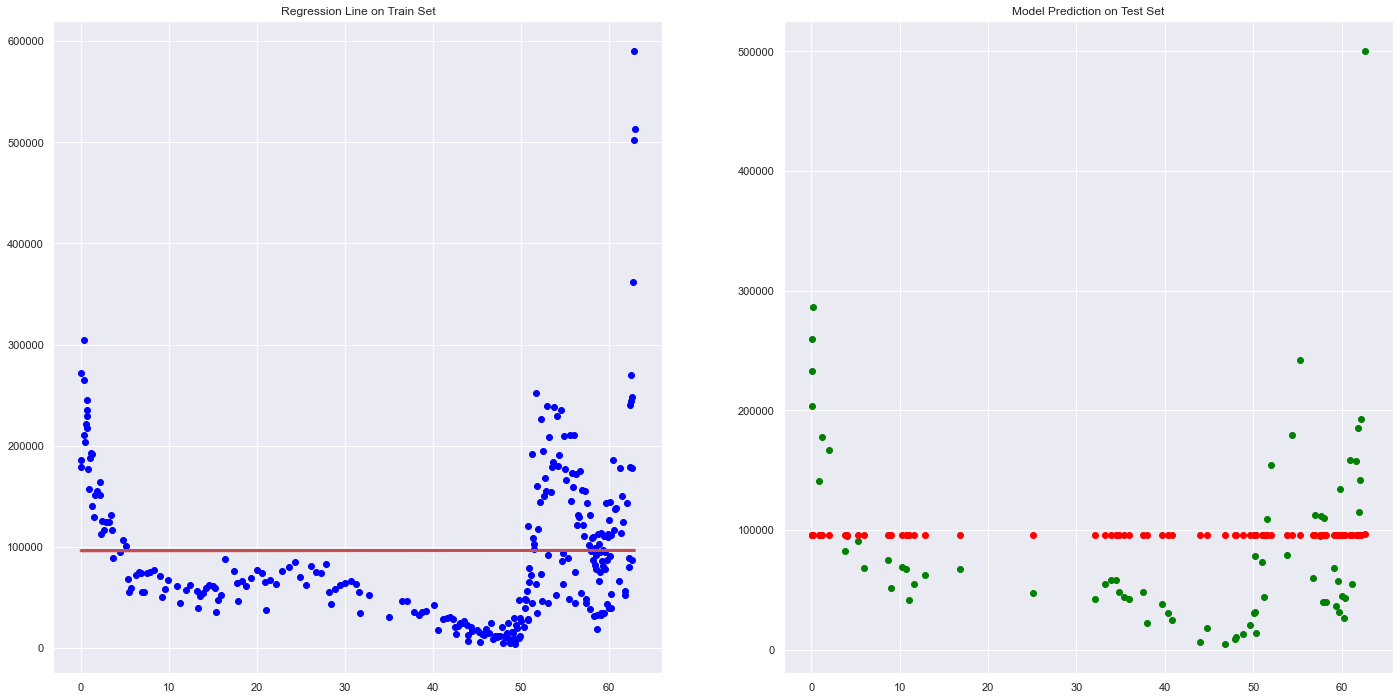

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 5.203921795704503e-07
Mean Squared Error (MSE) 	: 6533839618.763038

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 6567686883.469575



In [38]:
univariateLinearRegression(Xvar = "people_fully_vaccinated_per_hundred", yvar = "new_cases", df = UScovidDF21)

### Plotting stringency index against new cases recorded in the US

Firstly, we will need to define what is stringency index.

The stringency index is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans,
rescaled to a value from 0 to 100 (100 = strictest).

For US in the year of 2021, the lowest strigency index recorded is 46.76 and the highest stringency index recorded is 71.76.

<AxesSubplot:xlabel='stringency_index', ylabel='new_cases'>

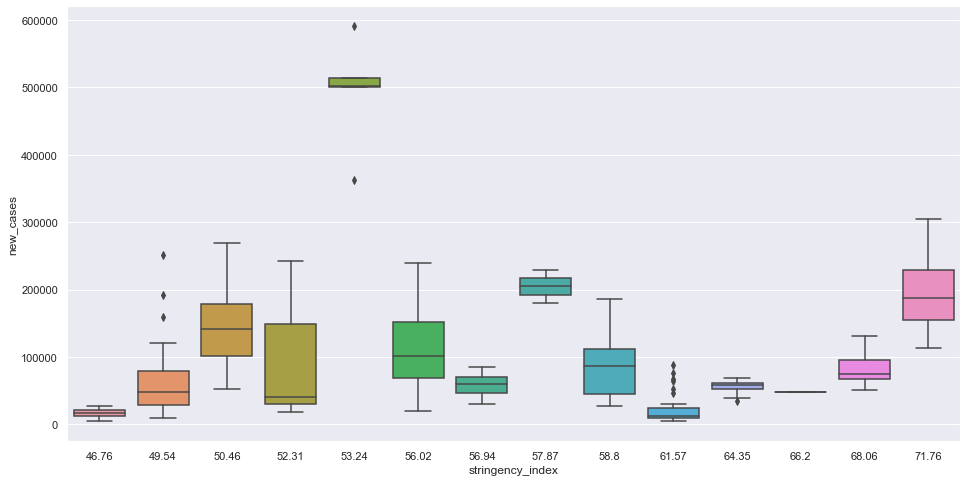

In [39]:
x = plt.figure(figsize=(16, 8))

sb.boxplot(x = UScovidDF21["stringency_index"], y = UScovidDF21["new_cases"])

### Breakdown on what can be observed from the graph
From the graph that was plotted, we can tell that even when the stringency index increases, this does not nessecarily mean that the covid cases reported daily will decrease and there is no clear distinct relationship between strignency index and covid cases.

However, in reality the opposite is true, when the number of covid cases reported in the US increases, then the governement responds by increasing the stringency index, hoping that the tightened measures will cause the number of cases to decrease.

And vice versa, if the number of covid cases in the US decreases, then the government responds by decreasing the stringency index. From the dataset, we can tell that the stringency index is the highest at the start of 2021, possibly due to the spike in the number of cases from the christmas and new year's holidays which we will explore later.

## Now we will take a look at whether the dataset of United Kingdom will give us the same results

### Exploration on how new tests will affect new cases

Intercept 	: b =  [3508.70978526]
Coefficients 	: a =  [[0.02675327]]


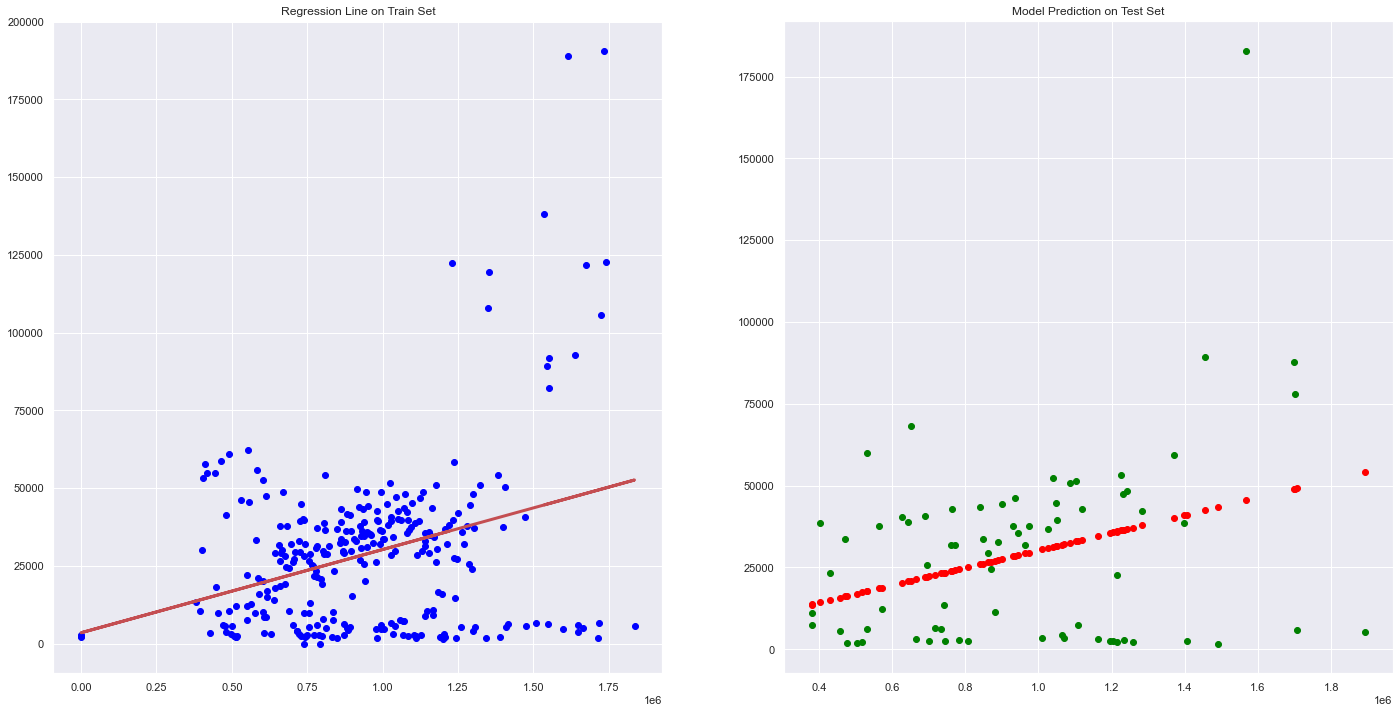

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10382956238760932
Mean Squared Error (MSE) 	: 639801372.8315064

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 758183278.7979738



In [47]:
univariateLinearRegression(Xvar = "new_tests", yvar = "new_cases", df = UKcovidDF21)

### Exploration on how the number new vaccinations affects the new cases

Intercept 	: b =  [32500.29853925]
Coefficients 	: a =  [[-0.01095983]]


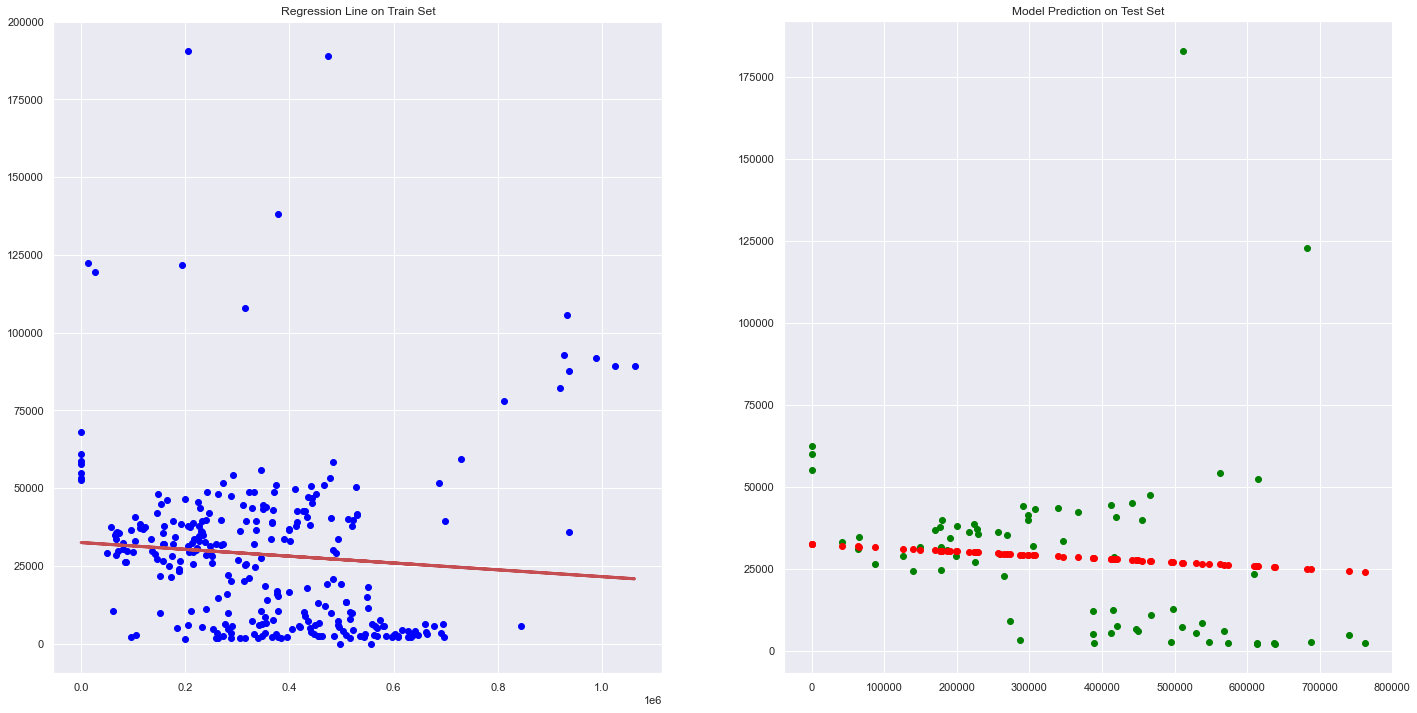

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0066505599607306065
Mean Squared Error (MSE) 	: 731856831.5425587

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 720508251.9862596



In [48]:
univariateLinearRegression(Xvar = "new_vaccinations", yvar = "new_cases", df = UKcovidDF21)

### Exploration on how the weekly hospital admissions affects new cases

Intercept 	: b =  [-15285.47232506]
Coefficients 	: a =  [[2.19979319]]


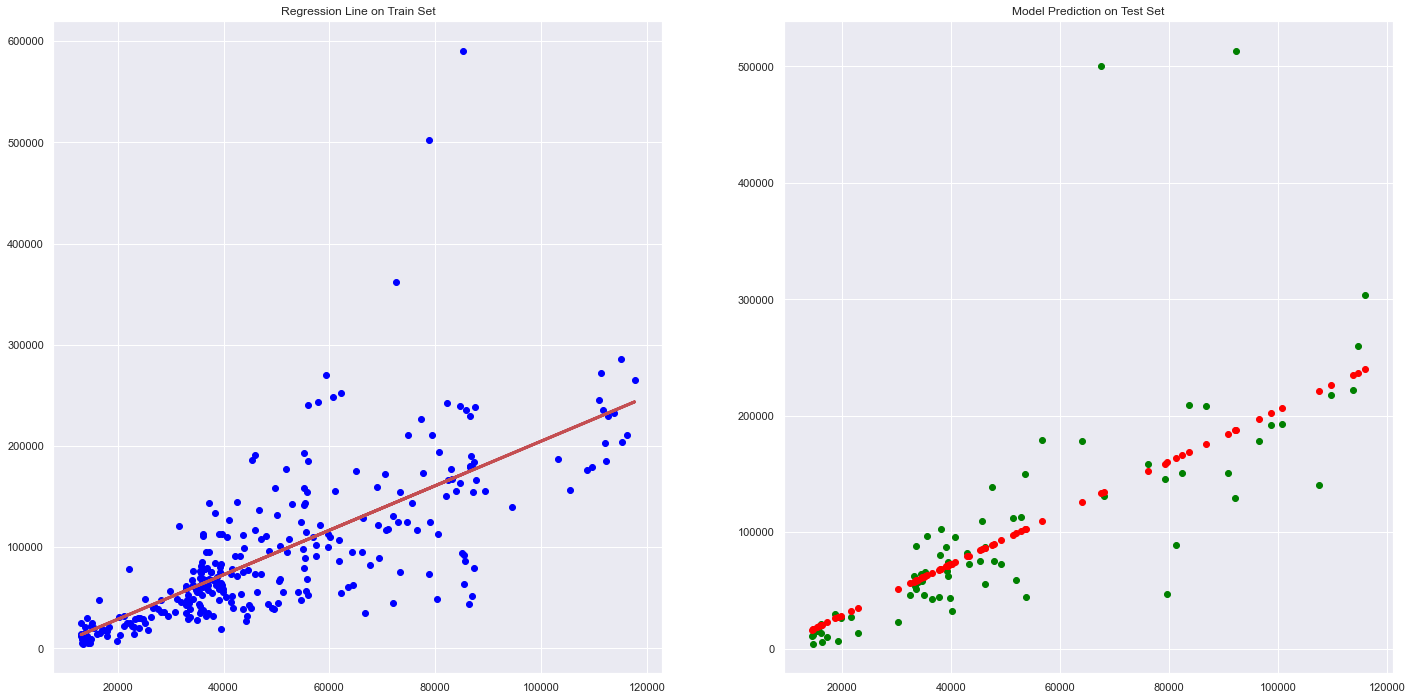

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5289841086929773
Mean Squared Error (MSE) 	: 2776586192.862476

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4240362977.308566



In [49]:
univariateLinearRegression(Xvar = "weekly_hosp_admissions", yvar = "new_cases", df = UScovidDF21)

### Exploration on how the number of ICU patients affects new cases

Intercept 	: b =  [24521.69880769]
Coefficients 	: a =  [[3.49997064]]


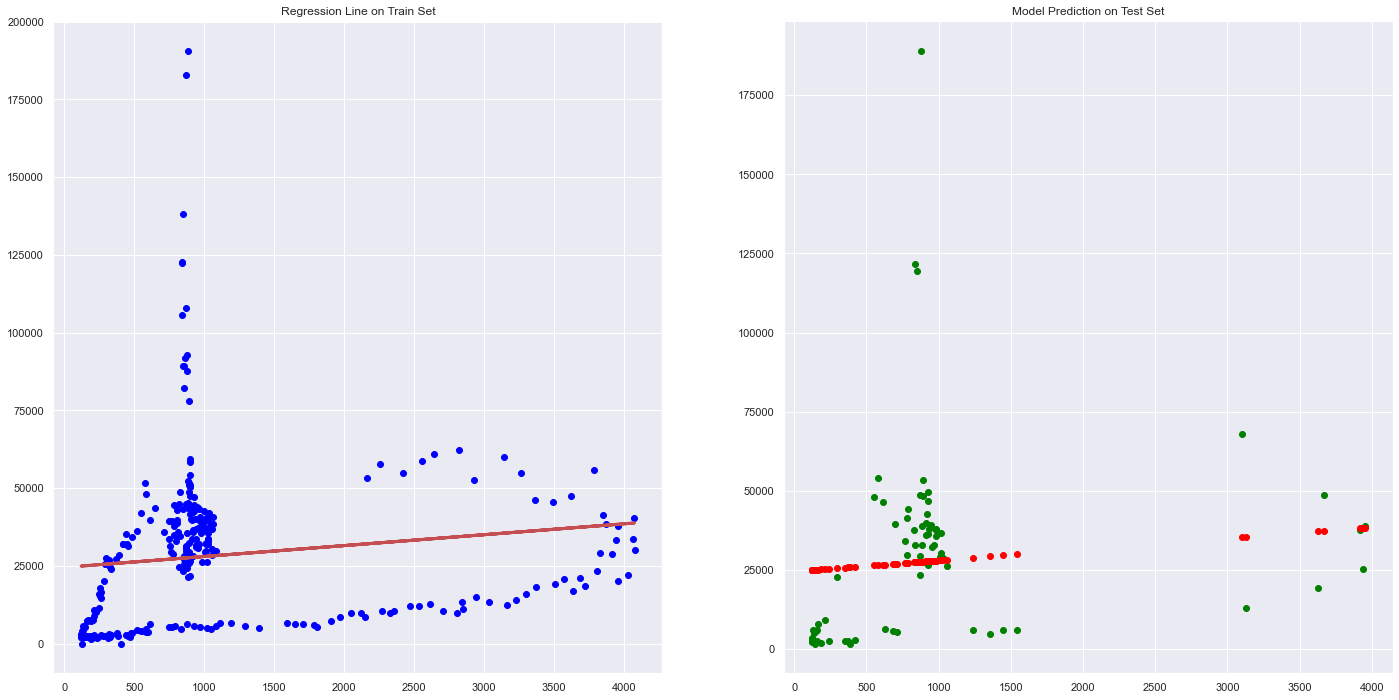

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.018214348723097018
Mean Squared Error (MSE) 	: 683167871.7463487

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 878697884.815062



In [50]:
univariateLinearRegression(Xvar = "icu_patients", yvar = "new_cases", df = UKcovidDF21)

### Exploration on how new deaths affects new cases

Intercept 	: b =  [25902.47377929]
Coefficients 	: a =  [[12.37309069]]


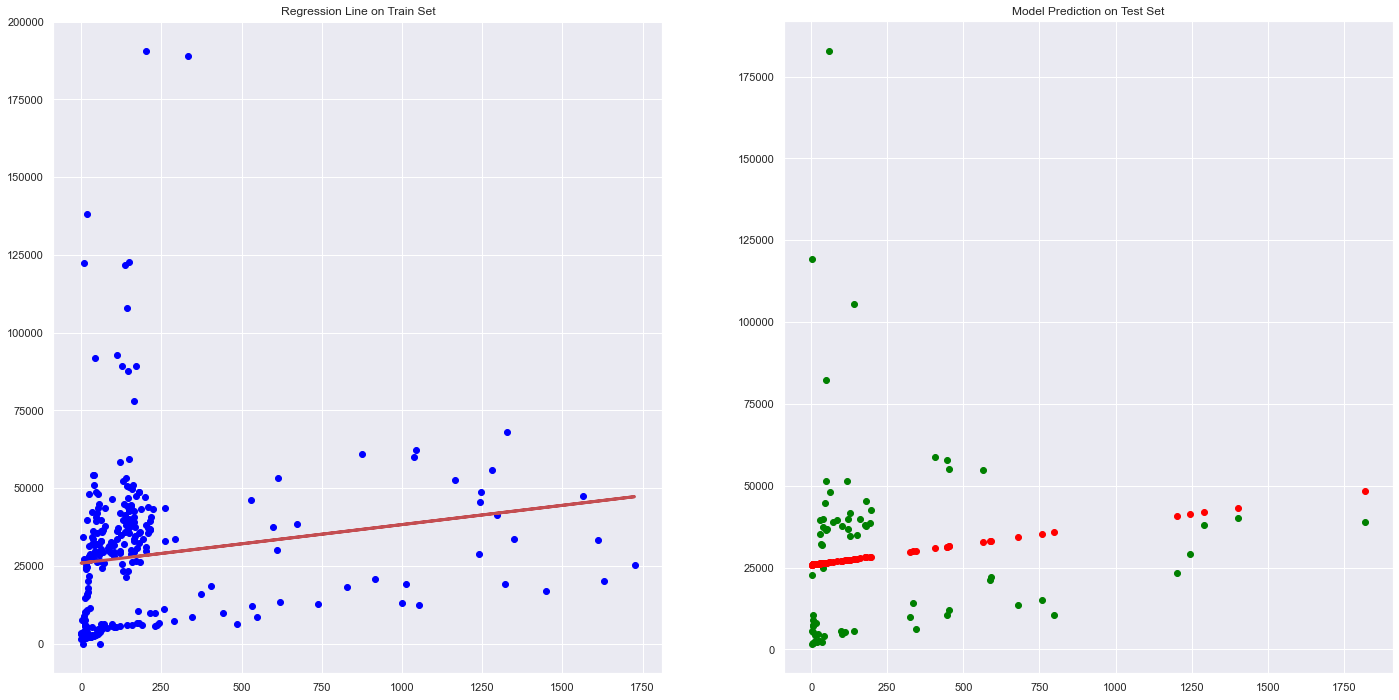

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.023309956797086362
Mean Squared Error (MSE) 	: 688378512.9430914

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 879656882.8314521



In [52]:
univariateLinearRegression(Xvar = "new_deaths", yvar = "new_cases", df = UKcovidDF21)

### Takeaway:

From the dataset of United Kingdom, we can see that the results of our exploration on United Kingdom is exactly the same as United States

From our exploratory work, we have concluded that there are way too many factors that can possibly affect the spread of the COVID-19 virus and in fact some of these factors are also inconsistent with the number of COVID-19 cases, therefore it will be hard to predict a trend for future cases using them.
